## Importing Libraries

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio as rio
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import earthpy.plot as ep
import earthpy as et
import xarray as xr
import geopy
from geopy.geocoders import Nominatim
import geoplot
from geopandas.tools import geocode
from matplotlib import collections, colors, transforms
from PIL import Image
from rasterio.windows import Window
from rasterio.windows import from_bounds
import rioxarray as rxr

## Address to  Geometry

In [2]:
#import requires modules
from geopandas.tools import geocode
 
#address we need to locate
loc = "Station Essen"
 
#finding the location
location = geocode(loc, provider="nominatim" , user_agent = 'my_request')
 
point = location.geometry.iloc[0]
print('Name: '+ loc )
print('complete address: '+ location.address.iloc[0])
print('longitude: {} '.format(point.x))
print('latitude: {} '.format(point.y))

location.dtypes


Name: Station Essen
complete address: Essen Station, Handelsstraat, Schildershof, Heikant, Essen, Antwerpen, Vlaanderen, 2910, België / Belgique / Belgien
longitude: 4.451288 
latitude: 51.463451 


geometry    geometry
address       object
dtype: object

In [3]:
# head of dataframe
location.head()

,geometry,address
0,POINT (4.45129 51.46345),"Essen Station, Handelsstraat, Schildershof, He..."


In [4]:
# converting coordinates from GPS to Lumbert
location = location.to_crs("EPSG:31370")

In [5]:
# geodataframe of location
location

,geometry,address
0,POINT (155735.738 239317.845),"Essen Station, Handelsstraat, Schildershof, He..."


In [6]:
location.geometry

0    POINT (155735.738 239317.845)
Name: geometry, dtype: geometry

In [7]:
location.bounds

,minx,miny,maxx,maxy
0,155735.737963,239317.844992,155735.737963,239317.844992


In [8]:
location.transform

<bound method DataFrame.transform of                         geometry  \
0  POINT (155735.738 239317.845)   

                                             address  
0  Essen Station, Handelsstraat, Schildershof, He...  >

In [106]:
# dataframe address in leaflet map
img = location.explore("address", cmap = "Reds")
img

<AxesSubplot:>

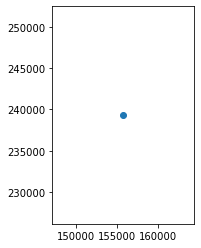

In [9]:
# dataframe address graph
location.plot()  

## LIDAR Data

### Working with GeoPandas

In [10]:
#Reading shapefile using geopandas

geo_dsm = gpd.read_file("C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

geo_dtm = gpd.read_file("C:/Users/HP/Downloads/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

In [11]:
# geo_dsm dataframe
geo_dsm

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [12]:
# geo_dtm dataframe
geo_dtm

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [13]:
# Bounds of geo_dsm file
geo_dsm.bounds

,minx,miny,maxx,maxy
0,144900.0,237758.67,162100.030020,247224.389995
1,144900.0,238850.25,162100.000132,243457.759998
2,144900.0,238493.37,162100.000116,243768.959990


In [14]:
# bounds of geo_dsm file
geo_dtm.bounds

,minx,miny,maxx,maxy
0,144900.0,237758.67,162100.030020,247224.389995
1,144900.0,238850.25,162100.000132,243457.759998
2,144900.0,238493.37,162100.000116,243768.959990


<AxesSubplot:>

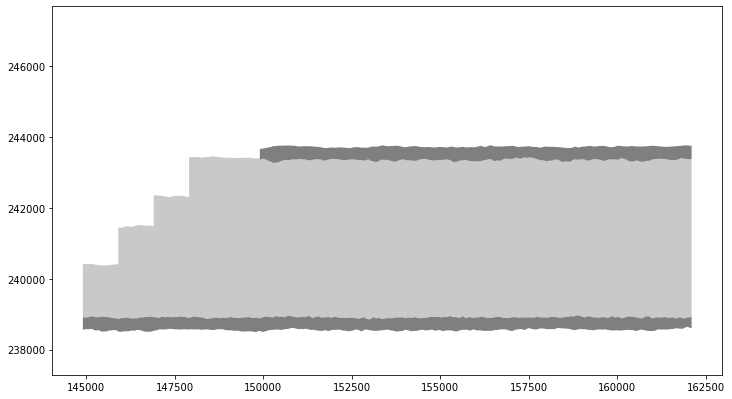

In [15]:
# create the plot of shapefile
fig, ax = plt.subplots(figsize=(12, 8))


#geo_dtm.plot(ax=ax, markersize=10, color='r')

# add the reprojected SJER boundary to the plot
geo_dsm.plot(cmap='Greys', ax=ax, alpha=.5)

[Text(0.5, 24.0, 'Longitude (Degrees)'),
 Text(72.80797331187979, 0.5, 'Latitude (Degrees)')]

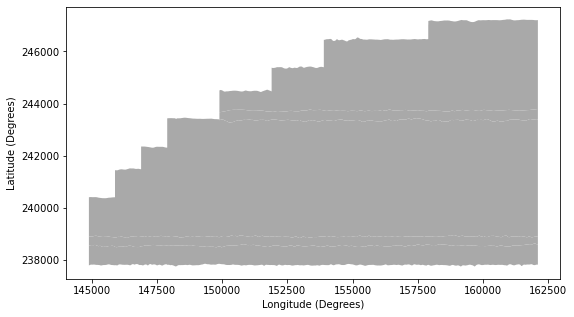

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
geo_dsm.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)")

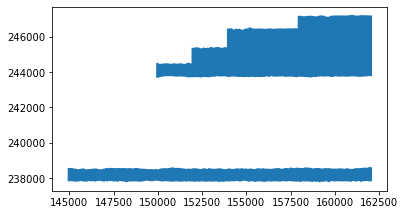

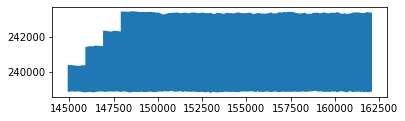

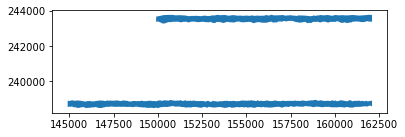

In [17]:
for row in geo_dsm.iterrows():    
    geom = gpd.GeoSeries(row[1].geometry)
    geom.plot()

### Working with Geotiff using Rasterio

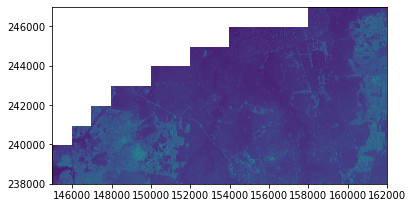

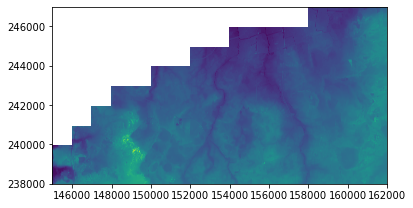

<AxesSubplot:>

In [18]:
# Extracting data from dsm (geotiff files)
dsm_path = r"C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"
dsm_file = rs.open(dsm_path)

# Plotting dsm lidar map
show(dsm_file)

# Extracting data from dtm (geotiff files)
dtm_path = r"C:/Users/HP/Downloads/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif"
dtm_file = rs.open(dtm_path)

# Plotting dtm lidar map
show(dtm_file)


In [19]:
# Extracting meta data of dtm and dsm
print("DTM : ",dtm_file.meta)
print("DSM : ",dsm_file.meta)

DTM :  {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
DSM :  {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [20]:
# Extracting meta data of dtm
print("DTM: ",dtm_file.bounds)
print("DSM: ",dsm_file.bounds)

DTM:  BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)
DSM:  BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


In [18]:
proj4 = et.epsg['31370']
print(proj4)

+proj=lcc +lat_1=51.16666723333333 +lat_2=49.8333339 +lat_0=90 +lon_0=4.367486666666666 +x_0=150000.013 +y_0=5400088.438 +ellps=intl +towgs84=-106.8686,52.2978,-103.7239,0.3366,-0.457,1.8422,-1.2747 +units=m +no_defs


In [19]:
geo_dsm.explore()

In [20]:
geo_dtm.explore()

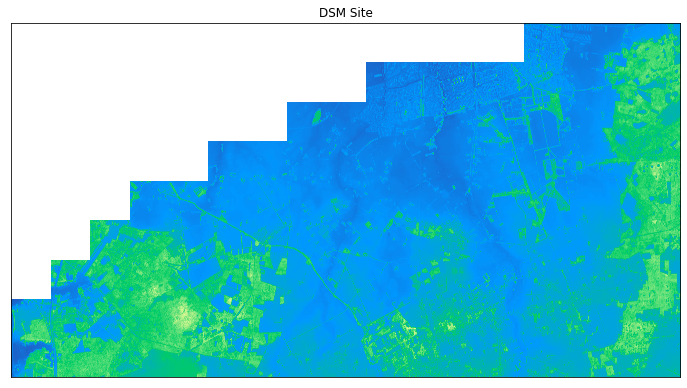

In [21]:
# DSM_1
import rasterio  as rio
with rio.open(dsm_path) as src:
    lidar_chm_im = src.read(masked=True)[0]
    extent = rio.plot.plotting_extent(src)
    soap_profile = src.profile

# plotting map of dsm    
ep.plot_bands(lidar_chm_im,
               cmap='terrain',
               extent=extent,
               title="DSM Site",
               cbar=False);


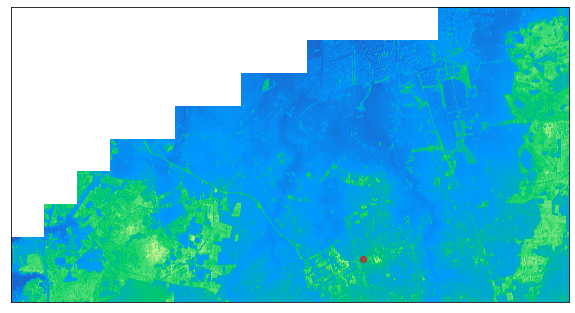

In [108]:
#plotting location in the dsm map

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_im,
              cmap='terrain',
              extent=extent,
              ax=ax,
              cbar=False)
location.plot(ax=ax, alpha=.6, color='r');

### Cropping Location

In [31]:
# finding the coordinates of location
location.geometry

0    POINT (155735.738 239317.845)
Name: geometry, dtype: geometry

In [32]:
# creating latitude and longitude variables
lat = 155735.737963
lon = 239317.844992

In [33]:
# creating location's polygon
minx = lat - 40
miny = lon - 40
maxx = lat + 40
maxy = lon + 40

In [34]:
# create box of polygon
from shapely import geometry
from shapely.geometry import box

bbox = box(minx, miny, maxx, maxy)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0])

In [35]:
#getting coordinates

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
coords = getFeatures(geo)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[155775.737963, 239277.844992], [155775.737963, 239357.844992], [155695.737963, 239357.844992], [155695.737963, 239277.844992], [155775.737963, 239277.844992]]]}]


In [36]:
#create a dataarray
out_img,out_transform  = rio.mask.mask(dsm_file, shapes=coords, crop=True, filled = True)
out_meta = dsm_file.meta.copy()
print(out_meta)
out_meta.update({"driver": "GTiff","height": out_img.shape[1],"width": out_img.shape[2],"transform": out_transform})

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [44]:
# opening tif file
out_tif = 'C:/Users/HP/Dropbox/BXL-Bouman-4/DHMVIIDSMRAS1m_k01.tif'

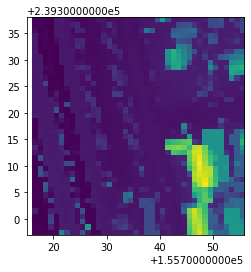

<AxesSubplot:>

In [46]:
#cropping plogon from tif file
with rio.open(out_tif, "r+", **out_meta) as dest:
    dest.write(out_img)
clipped = rio.open(out_tif)
rio.plot.show(clipped)

In [47]:
# image visual in png
from PIL import Image
im = Image.open(out_tif)
im.show()

In [55]:
# Crop_method.2.0
import rasterio
from rasterio.coords import BoundingBox

from rasterio import warp
from rasterio.mask import mask

from matplotlib.patches import Rectangle
src = 'C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
with rio.open(src) as dsm:
    left = lat - 20
    right = lat + 20
    bottom = lon - 20
    top = lon + 20
    window_123 = dsm.read(1,window=from_bounds(left,right,bottom,top,transform=dsm.transform ))
    #print(window)
    #plt.imshow(window_123)
    #dsm.meta

### Height of the building

In [52]:
# opening rioxarray of dtm and dsm

x_arr_dsm = rxr.open_rasterio("C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif",masked=True)
print(x_arr_dsm)
x_arr_dtm = rxr.open_rasterio("C:/Users/HP/Downloads/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif",masked=True)
print(x_arr_dtm)

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    scale_factor:        1.0
    add_offset:          0.0
<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  33.270000457764
    STATISTICS_MEAN:     12.715703254367
    STATISTICS_MINIMUM:  3.1400001049042
    STATISTICS_ST

In [54]:
height_arr = x_arr_dtm - x_arr_dsm 
height_arr

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
array([[[        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        [        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        [        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.02000046],
        [ 0.        ,  0.        ,  0.        , ..., -0.01000023,
          0.        , -0.01000023]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0

In [ ]:
#height_arr.plot()